In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [7]:
LiquorData = pd.read_csv("Liquor_Licenses.csv")

In [8]:
# split based on first instance of (3 in order to eventually remove the address and leave only longitude and latitude
# had to include 3 because this otherwise splits based on first instance of '(' which is problematic if address has '('
newLoc = LiquorData['Location 1'].str.split("\(3", n = 1, expand = True) 

longLat= newLoc[1]

#remove the parentheses in the end
longLat = longLat.str[:-1]

#add back the 3's to the beginning
longLat = '3' + longLat


#set location to the newly manipulated data so empty long/lat can be removed
LiquorData['Location']=longLat

#remove any liquor licenses without location coordinates
LiquorData.dropna(subset=['Location'], inplace = True) 

#now split into long and lat
splitLL = LiquorData['Location'].str.split(",", n = 1, expand = True)

#now adds the newly created long and lat columns back to the data frame
LiquorData['longitude']=splitLL[0]
LiquorData['latitude']=splitLL[1]

# Dropping old Location 1 and Location columns which had extra garbage in them
LiquorData.drop(columns =['Location 1'], inplace = True)
LiquorData.drop(columns =['Location'], inplace = True) 




In [9]:
#print(LiquorData['longitude'])
#print(LiquorData['latitude'])
#print(LiquorData)

In [10]:
CrimeData = pd.read_csv("911_Police_Calls_for_Service.csv")

# split based on first instance of (3 in order to eventually remove the address and leave only longitude and latitude
# had to include 3 because this otherwise splits based on first instance of '(' which is problematic if address has '('
newLoc = CrimeData['location'].str.split("\(3", n = 1, expand = True) 

longLat= newLoc[1]

#remove the parentheses in the end
longLat = longLat.str[:-1]

#add back the 3's to the beginning
longLat = '3' + longLat


#set location to the newly manipulated data so empty long/lat can be removed
CrimeData['Location']=longLat

#remove any liquor licenses without location coordinates
CrimeData.dropna(subset=['Location'], inplace = True) 

#now split into long and lat
splitLL = CrimeData['Location'].str.split(",", n = 1, expand = True)

#now adds the newly created long and lat columns back to the data frame
CrimeData['longitude']=splitLL[0]
CrimeData['latitude']=splitLL[1]

# Dropping old Location 1 and Location columns which had extra garbage in them
CrimeData.drop(columns =['location'], inplace = True)
CrimeData.drop(columns =['Location'], inplace = True) 



In [11]:
#print(CrimeData['longitude'])
#print(CrimeData['latitude'])
#print(CrimeData)

In [12]:
#change attributes for license start and end date to date-time in pandas
LiquorData['LicenseEndDate'] = pd.to_datetime(LiquorData['LicenseEndDate'])
LiquorData['LicenseDate'] = pd.to_datetime(LiquorData['LicenseDate'])

#start date and end date for liqor licenses we will be looking at
start_date = '05-01-2017'
end_date = '04-30-2018'

#use masks to filter liquor licenses 
maskEndDate =  (LiquorData['LicenseEndDate'] >= end_date)
maskStartDate= (LiquorData['LicenseDate'] <= start_date)

LiquorData = LiquorData.loc[maskEndDate]
LiquorData = LiquorData.loc[maskStartDate]

print(LiquorData)

      LicenseClass SubClass  LicenseNumber LicenseDate LicenseEndDate  \
1445             D        B            3.0  2017-05-01     2018-04-30   
11619           WD       BW            5.0  2017-05-01     2018-04-30   
11683           LB      BWL          179.0  2017-05-01     2018-04-30   
11904           LB      BWL          234.0  2017-05-01     2018-04-30   
12068           WD       BW           19.0  2017-05-01     2018-04-30   
17535           LB      BWL          155.0  2017-05-01     2018-04-30   
17540         LBD7      BWL           25.0  2017-05-01     2018-04-30   
17543           LB      BWL          123.0  2017-05-01     2018-04-30   
17547           LB      BWL            6.0  2017-05-01     2018-04-30   
17548         LBD7      BWL           99.0  2017-05-01     2018-04-30   
17551           LB      BWL          167.0  2017-05-01     2018-04-30   
17553           LB      BWL          132.0  2017-05-01     2018-04-30   
17555           LB      BWL          121.0  2017-05

In [13]:
#split call date time around space into date and other data we don't care about (time of the call)
dateSegment = CrimeData['callDateTime'].str.split(" ", n = 1, expand = True) 

#set time to the newly manipulated data so only date is included and time is removed
CrimeData['date']=dateSegment[0]

#remove the old column with unnecessary data
CrimeData.drop(columns =['callDateTime'], inplace = True)

#print(CrimeData)

In [14]:
#change attributes for crime date to date-time in pandas
CrimeData['date'] = pd.to_datetime(CrimeData['date'])

#the start and end date to be used for range in which crimes must have happened. (while those 2000+ locations were licensed)
start_date = '05-01-2017'
end_date = '04-30-2018'

#create mask and use it to filter crimes to only include crimes perpetrated in that date range
maskCrimeDate =  (CrimeData['date'] > start_date) & (CrimeData['date'] <= end_date) 

CrimeData = CrimeData.loc[maskCrimeDate]

print(CrimeData)

         recordId       priority district       description  callNumber  \
22291     2899750         Medium       SD          BURGLARY  P172770123   
22292     2899621  Non-Emergency       WD         FOLLOW UP  P172763205   
22294     2915175            Low       NE       INVESTIGATE  P172821408   
22297     2903054         Medium       CD     911/NO  VOICE  P172780681   
22299     2915815         Medium       ND        DISORDERLY  P172822136   
22301     2916943           High       NE      SILENT ALARM  P172830308   
22302     2913779         Medium       CD        DISORDERLY  P172812739   
22303     2917762         Medium       SW    COMMON ASSAULT  P172831274   
22305     2897505           High       SW       CAR JACKING  P172760843   
22306     2904600         Medium       SD    COMMON ASSAULT  P172782481   
22307     2900653         Medium       CD  NARCOTICSOutside  P172771204   
22308     2915460         Medium       CD        DISORDERLY  P172821740   
22309     2909002  Non-Em

In [15]:
LiquorData.to_csv('2017-2018Liquor.csv')

In [16]:
CrimeData.to_csv('2017-2018Crime.csv')

In [17]:
LiquorData = pd.read_csv('2017-2018Liquor.csv')
CrimeData = pd.read_csv('2017-2018Crime.csv')

CrimeData['longitude'] = pd.to_numeric(CrimeData['longitude'])
CrimeData['latitude'] = pd.to_numeric(CrimeData['latitude'])



In [28]:
XY = {'long': CrimeData['longitude'], 'lat': CrimeData['latitude']}
XY = pd.DataFrame(data=XY)

matrix = XY.values
# Using sklearn
km = KMeans(n_clusters=50)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T

print(labels)

[24  0 31 ... 31 28 43]


In [19]:

#colors = ['red', 'yellow', 'blue', 'orange', 'green', 'purple', 'pink']
#plt =LiquorData.plot.scatter(x='longitude', y='latitude', color='white')
#for index, row in results.iterrows():
#    if row[1] == 1:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[1])
#    if row[1] == 1:

In [21]:
print(results)
results.to_csv('crimeresults.csv')
#this was for 5 clusters 

             0  1
0            0  0
1            1  0
2            2  0
3            3  0
4            4  0
5            5  0
6            6  0
7            7  0
8            8  0
9            9  0
10          10  0
11          11  0
12          12  0
13          13  0
14          14  0
15          15  0
16          16  0
17          17  0
18          18  0
19          19  0
20          20  0
21          21  0
22          22  0
23          23  0
24          24  0
25          25  0
26          26  0
27          27  0
28          28  0
29          29  0
...        ... ..
734082  734082  0
734083  734083  0
734084  734084  0
734085  734085  0
734086  734086  0
734087  734087  0
734088  734088  0
734089  734089  0
734090  734090  0
734091  734091  0
734092  734092  0
734093  734093  0
734094  734094  0
734095  734095  0
734096  734096  0
734097  734097  0
734098  734098  0
734099  734099  0
734100  734100  0
734101  734101  0
734102  734102  0
734103  734103  0
734104  734104  0
734105  73

In [27]:
results[1].value_counts()
#for 5 clusters

0    728877
4      2636
1      1839
3       588
2       172
Name: 1, dtype: int64

In [29]:
results[1].value_counts()
#for 50 clusters

28    142752
0     102012
10     97498
39     80169
48     74592
44     67768
31     62759
43     43641
24     33005
47      5435
11      3992
16      3016
15      2984
26      2944
29      2532
7       2020
45      1733
1       1420
18       591
6        532
23       437
3        338
49       334
32       232
38       189
20       161
5        115
4        110
22        97
9         78
2         76
12        58
13        49
25        49
33        47
21        46
19        37
41        36
8         33
27        33
17        27
14        23
35        20
34        19
42        18
30        16
36        14
46        11
40        11
37         3
Name: 1, dtype: int64

In [34]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)

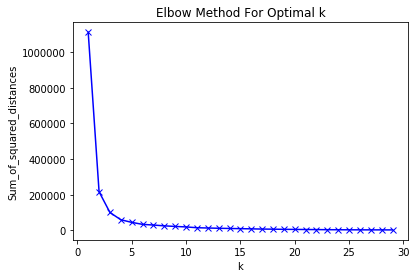

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
#looks like 3 or 4 is a good k-value 
km = KMeans(n_clusters=4)
km = km.fit(matrix)
labels = km.labels_
results = pd.DataFrame([XY.index,labels]).T

#results for 4 indicate mainly one central cluster and 3 small ones outside
results[1].value_counts()

0    731329
2      1840
3       771
1       172
Name: 1, dtype: int64